## CASE STUDY 1 - Retail Case Study 

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset

In [2]:
Customer = pd.read_csv('E:\Customer.csv')
Prod_Info = pd.read_csv('E:\prod_cat_info.csv')
Transactions = pd.read_csv('E:\Transactions.csv')

In [3]:
Customer.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [4]:
Prod_Info.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [5]:
Transactions.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [6]:
#Re-naming prod_sub_cat_code to prod_subcat_code to match the name with the Transaction table
Prod_Info.rename(columns = {"prod_sub_cat_code"  : "prod_subcat_code"}, inplace=True)

In [7]:
Prod_Info.head(2)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


### Q1. Merge the datasets Customer, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [8]:
# Merge Transactions and Prod_Info table
Temp = pd.merge(Transactions, Prod_Info, left_on=['prod_subcat_code','prod_cat_code'], right_on=['prod_subcat_code','prod_cat_code'], how="left")

In [9]:
Temp.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers


In [10]:
# Merge Temp and Customer table
Customer_Final = pd.merge(Temp,Customer,left_on='cust_id',right_on='customer_Id',how="left")

In [11]:
Customer_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0


In [12]:
# Rows of both Customer_Final and Transactions table is same which indicates that all the transactions done are present in the
# final table
print(Customer_Final.shape)
print(Transactions.shape)

(23053, 16)
(23053, 10)


In [13]:
# Checking for data types
Customer_Final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [14]:
# Converting "DOB" and "tran_date" from object dtype to dates
Customer_Final["DOB"] = pd.to_datetime(Customer_Final["DOB"], format="%d-%m-%Y")
Customer_Final["tran_date"] = pd.to_datetime(Customer_Final["tran_date"])

In [15]:
Customer_Final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

In [16]:
# Checking for Duplicate Values
Customer_Final.duplicated().sum()

13

In [17]:
# Dropping Duplicate rows
Customer_Final.drop_duplicates(inplace=True)

In [18]:
Customer_Final.duplicated().sum()

0

### Q2. Prepare the summary report for the merged data set

### a) Get the column names and their corresponding data types 

In [19]:
Customer_Final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

### b) Top/Bottom 10 observations

In [20]:
# Top 10 observations
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-10-09,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-11-04,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0


In [21]:
# Bottom 10 observations
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


### c) "Five number summary" for continuous variables (min, Q1, median, Q3, max)

In [30]:
Customer_Final.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,23040.0,5.006955e+10,2.898062e+10,3268991.000,2.493315e+10,5.009188e+10,7.532632e+10,9.998755e+10
cust_id,23040.0,2.710219e+05,2.431574e+03,266783.000,2.689350e+05,2.709805e+05,2.731142e+05,2.752650e+05
prod_subcat_code,23040.0,6.148785e+00,3.726197e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,23040.0,3.763498e+00,1.677091e+00,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,23040.0,2.435764e+00,2.264326e+00,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,23040.0,6.370950e+02,6.217274e+02,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,23040.0,2.486775e+02,1.871883e+02,7.350,9.828000e+01,1.990800e+02,3.657675e+02,7.875000e+02
total_amt,23040.0,2.109865e+03,2.505610e+03,-8270.925,7.624500e+02,1.756950e+03,3.570255e+03,8.287500e+03
customer_Id,23040.0,2.710219e+05,2.431574e+03,266783.000,2.689350e+05,2.709805e+05,2.731142e+05,2.752650e+05
city_code,23032.0,5.483067e+00,2.863331e+00,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01


### d) Frequency tables for all the categorical values

In [26]:
Customer_Final.loc[:,Customer_Final.dtypes == "object"].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


### Q3. Generate histograms for all continuous variables and frequency bars for categorical variables

#### Histogram for Continuous Variables

In [33]:
continuous_var = Customer_Final.loc[:,['Qty','Rate','Tax','total_amt']]

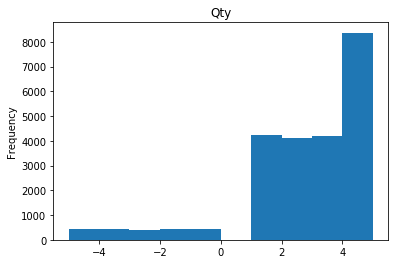

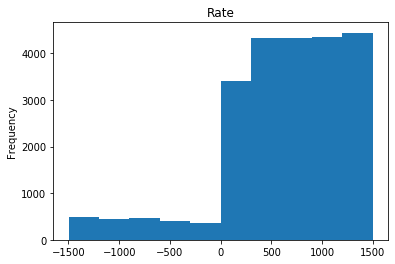

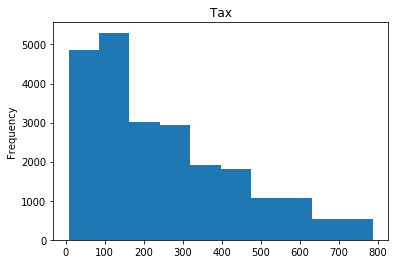

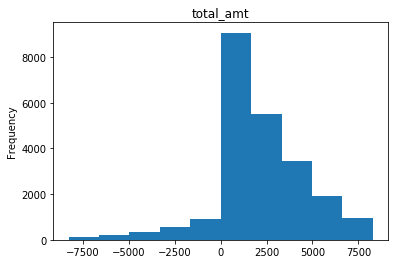

In [34]:
for var in continuous_var.columns:
    continuous_var[var].plot(kind='hist')
    plt.title(var)
    plt.show()

#### Frequency Bars for Categorical Variables

In [36]:
categorical_var = Customer_Final.loc[:,['Store_type','prod_cat','prod_subcat','Gender']]

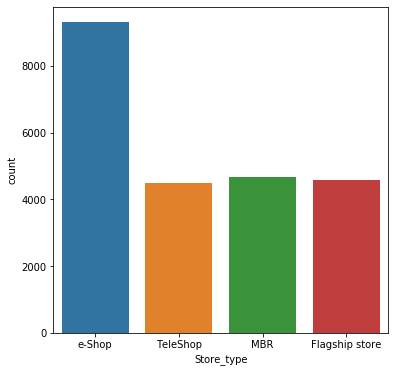

In [53]:
plt.figure(figsize=(6,6))
sns.countplot(categorical_var['Store_type'])
plt.show()

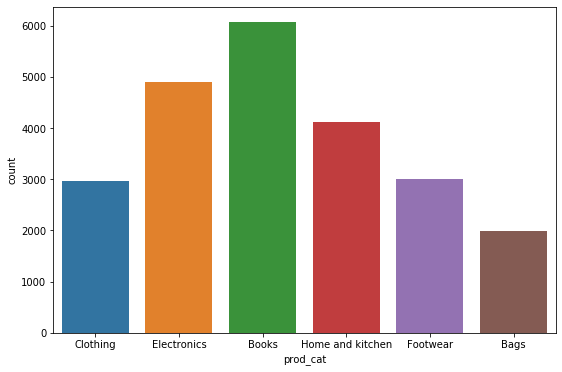

In [52]:
plt.figure(figsize=(9,6))
sns.countplot(categorical_var['prod_cat'])
plt.show()

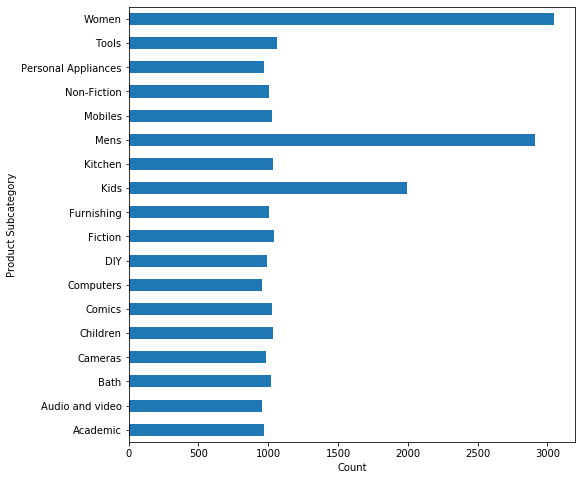

In [55]:
plt.figure(figsize=(8,8))
categorical_var.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.show()

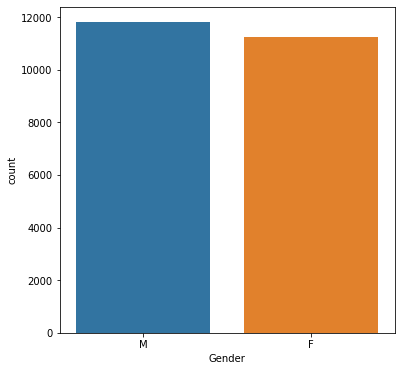

In [48]:
plt.figure(figsize=(6,6))
sns.countplot(categorical_var['Gender'])
plt.show()

### Q4. Calculate the following information using the merged dataset 

### a) Time period of the available transaction data

In [59]:
min_date = Customer_Final["tran_date"].min()
max_date = Customer_Final["tran_date"].max()
print(min_date)
print(max_date)

2011-01-02 00:00:00
2014-12-02 00:00:00


In [60]:
print("Time period of the available transaction data is from "+ 
      pd.Timestamp.strftime(min_date,format="%m-%d-%Y") + " to " + pd.Timestamp.strftime(max_date,format="%m-%d-%Y"))

Time period of the available transaction data is from 01-02-2011 to 12-02-2014


In [61]:
# The total number of days for which the data is available
max_date - min_date

Timedelta('1430 days 00:00:00')

### b) Count of the transactions where the total amount of transaction was negative

In [184]:
Neg_Transactions = Customer_Final.groupby(['transaction_id'])[['total_amt']].sum().reset_index()
Neg_Transactions[(Neg_Transactions.total_amt < 0)].shape[0]

106

### Q5. Analyze which product categories are more popular among females vs male customers

In [87]:
Product_popularity = Customer_Final.groupby(['Gender','prod_cat'])[['Qty']].sum().reset_index()
Product_popularity.pivot(index="Gender",columns="prod_cat",values="Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


##### Products that are popular among Males are : Books, Clothing, Electronics, Home and Kitchen.
##### Products that are popular among Females are: Bags and Footwear

### Q6. Which city code has the maximum customers and what was the percentage of the customers from that city.

In [88]:
Customer_count = Customer_Final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)
Customer_count

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: customer_Id, dtype: int64

##### The maximum no. of customers are from city code 4 and the count is 2422.

In [90]:
Percentage = round((Customer_count[4.0] / Customer_count.sum()) * 100,2)
Percentage

10.52

### Q7. Which store type sells the maximum products by value and by quantity?

In [101]:
Customer_Final.groupby(['Store_type'])[['Qty','Rate']].sum().sort_values(by='Qty', ascending = False).reset_index()

,Store_type,Qty,Rate
0,e-Shop,22790,5945770
1,MBR,11195,2953665
2,Flagship store,11142,2942874
3,TeleShop,10993,2836359


##### The store type "e-Shop" sold the maximum products by value and by quantity.

### Q8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship stores?

In [102]:
Store_data = round(Customer_Final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)
Store_data

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.83,848678.68,789181.06,1617933.27
Books,2493677.81,2496039.20,2545714.47,5297161.15
Clothing,1194423.23,1287686.34,1241834.36,2527193.57
Electronics,2215136.04,2107969.82,1978457.19,4429142.77
Footwear,1234806.56,1112163.72,1235719.29,2643215.25
Home and kitchen,1713004.15,1822403.57,1581227.37,3327977.12


In [103]:
Store_data.loc[['Clothing','Electronics'],'Flagship store']

prod_cat
Clothing       1194423.23
Electronics    2215136.04
Name: Flagship store, dtype: float64

In [109]:
# In order to show the total amount for both the above categories
Store_data.loc[['Clothing','Electronics'],'Flagship store'].sum()

3409559.27

### Q9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [107]:
Gender_data = round(Customer_Final.pivot_table(index = "Gender", columns = "prod_cat", values = "total_amt", aggfunc = "sum"),2)
Gender_data

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2079618.84,6174590.82,3026750.8,5019354.21,3203155.21,4133702.23
M,2046722.99,6645972.77,3224079.5,5711351.62,3020200.37,4305169.51


In [108]:
Gender_data.loc["M","Electronics"]

5711351.62

### Q10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [130]:
positive_trans = Customer_Final.loc[Customer_Final.total_amt > 0,:]
Unique_trans = positive_trans.groupby("cust_id")['transaction_id'].count().reset_index()
Unique_trans.loc[Unique_trans.transaction_id>=10,:].shape[0]

27

### Q.11 For all Customers aged between 25-35, find out:

### a) What was the total amount spent for "Electronics" and "Books" product categories? 

In [149]:
df1 = pd.DataFrame()
df1['diff_date'] = pd.to_datetime(Customer_Final['DOB'], format='%Y-%m-%d')
diff_date = df1['diff_date'].dt.year

df2 = pd.DataFrame()
df2['tran_date'] = pd.to_datetime(Customer_Final['tran_date'], format='%Y-%m-%d')
tran_date = df2['tran_date'].dt.year

In [150]:
Customer_Final['Age'] = tran_date - diff_date

In [159]:
Customer_Final.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,Age,Age_category
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,33,25-35
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,41,36-46
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,22,15-24


In [164]:
# Creating groups of Age
Customer_Final['Age_category'] = pd.cut(Customer_Final['Age'],bins=[15,24,35,46],
                                        labels=['15-24','25-35','36-46'],include_lowest=True)

In [165]:
Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,Age,Age_category
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,33,25-35
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,41,36-46
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,22,15-24
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,33,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,22,15-24


In [169]:
Customer_cat = Customer_Final.groupby(['Age_category','prod_cat'])['total_amt'].sum()
Customer_cat

Age_category  prod_cat        
15-24         Bags                 865354.230
              Books               2613142.675
              Clothing            1411967.895
              Electronics         2262838.890
              Footwear            1365898.235
              Home and kitchen    1852609.850
25-35         Bags                1930829.485
              Books               6087089.190
              Clothing            3089438.560
              Electronics         5146759.605
              Footwear            3067277.785
              Home and kitchen    4033784.820
36-46         Bags                1330158.115
              Books               4132360.765
              Clothing            1749731.035
              Electronics         3321107.335
              Footwear            1792728.795
              Home and kitchen    2558217.545
Name: total_amt, dtype: float64

In [173]:
Customer_cat.loc['25-35',['Electronics','Books']]

Age_category  prod_cat   
25-35         Books          6087089.190
              Electronics    5146759.605
Name: total_amt, dtype: float64

In [175]:
round(Customer_cat.loc['25-35',['Electronics','Books']].sum(),2)

11233848.8

### b) What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014

In [179]:
# Filtering the data of Age 25-35
Customer_adult = Customer_Final[Customer_Final['Age_category']=='25-35']
Customer_adult.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,Age,Age_category
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,33,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,33,25-35


In [180]:
Total_amount_spent = Customer_adult[(Customer_adult['tran_date'] >='2014-01-01') & 
                                           (Customer_adult['tran_date'] <='2014-03-01')]
Total_amount_spent['total_amt'].sum()

685698.91